In [301]:
# import module
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
df = pd.read_csv('phone.csv')

# data cleansing
clean_data = df.loc[(df["battery_power"] > 0) & (df["clock_speed"] > 0) & (df["ram"] > 0) & (df["n_cores"] > 0) & (df["use_time"] >= 0) & (df["px_width"] > 0) & (df["px_height"] > 0) & (df["brand"] != "undefined") & (df["5g"] > 0) & (df["grade"] != "undefined") & (df["price"] > 0)]
clean_data = clean_data.drop_duplicates()
clean_data = clean_data.reset_index(drop=True)
df = clean_data

# separating number and string attribute
number_data = df.select_dtypes(include=float)
string_data = df.select_dtypes(include=object)

# buang outlier
# Battery Power
q11 = df["battery_power"].quantile(0.25)
q31 = df["battery_power"].quantile(0.75)
iqr1 = q31 - q11
temp = df.loc[(df["battery_power"] >= (q11 - 1.5*iqr1)) & (df["battery_power"] <= (q31 + 1.5*iqr1))]

# Clock Speed
q12 = df["clock_speed"].quantile(0.25)
q32 = df["clock_speed"].quantile(0.75)
iqr2 = q32 - q12
temp = temp.loc[(temp["clock_speed"] >= (q12 - 1.5*iqr2)) & (temp["clock_speed"] <= (q32 + 1.5*iqr2))]

# Ram
q13 = df["ram"].quantile(0.25)
q33 = df["ram"].quantile(0.75)
iqr3 = q33 - q13
temp = temp.loc[(temp["ram"] >= (q13 - 1.5*iqr3)) & (temp["ram"] <= (q33 + 1.5*iqr3))]

# N Cores
q14 = df["n_cores"].quantile(0.25)
q34 = df["n_cores"].quantile(0.75)
iqr4 = q34 - q14
temp = temp.loc[(temp["n_cores"] >= (q14 - 1.5*iqr4)) & (temp["n_cores"] <= (q34 + 1.5*iqr4))]

# Use Time
q15 = df["use_time"].quantile(0.25)
q35 = df["use_time"].quantile(0.75)
iqr5 = q35 - q15
temp = temp.loc[(temp["use_time"] >= (q15 - 1.5*iqr5)) & (temp["use_time"] <= (q35 + 1.5*iqr5))]

# PX Width
q16 = df["px_width"].quantile(0.25)
q36 = df["px_width"].quantile(0.75)
iqr6 = q36 - q16
temp = temp.loc[(temp["px_width"] >= (q16 - 1.5*iqr6)) & (temp["px_width"] <= (q36 + 1.5*iqr6))]

# PX Height
q17 = df["px_height"].quantile(0.25)
q37 = df["px_height"].quantile(0.75)
iqr7 = q37 - q17
temp = temp.loc[(temp["px_height"] >= (q17 - 1.5*iqr7)) & (temp["px_height"] <= (q37 + 1.5*iqr7))]

# 5G
q18 = df["5g"].quantile(0.25)
q38 = df["5g"].quantile(0.75)
iqr8 = q38 - q18
temp = temp.loc[(temp["5g"] >= (q18 - 1.5*iqr8)) & (temp["5g"] <= (q38 + 1.5*iqr8))]

# Price
q19 = clean_data["price"].quantile(0.25)
q39 = clean_data["price"].quantile(0.75)
iqr9 = q39 - q19
temp = temp.loc[(temp["price"] >= (q19 - 1.5*iqr9)) & (temp["price"] <= (q39 + 1.5*iqr9))]

print(len(temp))
df = temp

1859


### SOAL 3 <a id="soal-2"></a>
---
Pada bagian ini, setiap kolom data akan divisualisasikan. Data yang berbentuk numerik akan ditampilkan dalam bentuk histogram dan boxplot. Sementara untuk data yang berbentuk string akan ditampilkan dalam bentuk histogram saja. Pada bagian bawah gambar hasil visualisasi juga dijelaskan bagaimana kondisi masing-masing kolom berdasarkan hasil visualisasi. Jika sebuah data pada kolom menghasilkan histogram yang kurvanya berbentuk lonceng dan memiliki titik puncak kurang lebih berada di tengah/dekat dengan rata-rata dapat dicurigai data pada kolom tersebut tidak jauh dari distribusi normal(nilai <i>skew</i> mendekati 0). Jika sebuah data pada kolom menghasilkan boxplot yang menunjukkan bahwa nilai median berada kurang lebih di tengah minimum dan maksimum, serta ditengah Q1 dan Q3 maka dapat dicurigai data pada kolom tersebut tidak jauh dari distribusi normal. Sementara untuk mengetahui kepastian apakah data pada kolom terdistribusi normal atau tidak akan dibahas pada perhitungan di pembahasan soal 4.

Deklarasi prosedur untuk menampilkan hasil visualisasi data.

In [302]:
def visualizeNumericData(col) :
    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    splitted_title = col.split('_')
    title = ' '.join(word.title() for word in splitted_title)
    fig.suptitle(title + ' Data Visualization', size=18, weight='bold')
    axes[0].set_title(title + " Data Histogram", size=14)
    axes[0].set_xlabel('value', size=12)
    axes[1].set_title(title + " Data Boxplot", size=14)
    axes[1].set_xlabel('value', size=12)
    df[col].plot(kind='hist', bins=40, rwidth = 0.85, ax = axes[0])
    df.boxplot(column=col, ax=axes[1])

In [303]:
def visualizeStringData(col) :
    splitted_title = col.split('_')
    title = ' '.join(word.title() for word in splitted_title)
    string_data[col].value_counts().plot(kind='bar')
    plt.title(title + ' Data Visualization', size=18, weight='bold')
    plt.xlabel(title)
    plt.xticks(rotation=0)
    plt.ylabel('Frequency')

#### Kolom Battery Power <a id="kolom-battery-power"></a>


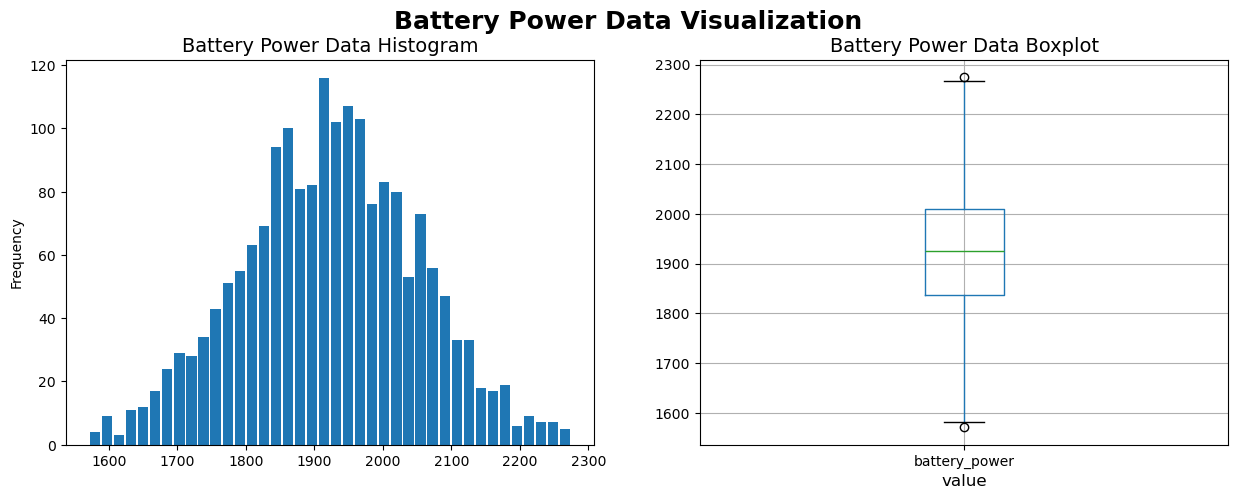

In [304]:
visualizeNumericData('battery_power')

Jika melihat hasil visualisasi boxplot, median dari data pada kolom Battery Power berada kurang lebih tepat di tengah nilai minimum dan maksimum, serta ditengah Q1 dan Q3. Hal tersebut menunjukkan bahwa data pada kolom Battery Power cenderung simetris/tidak jauh dari distribusi normal. Gambar boxplot menunjukkan adanya outlier di atas dan di bawah maksimum dan minimum. Adanya outlier mengindikasikan bahwa data dicurigai tidak mendekati distribusi normal. Namun, jika kita melihat histogram, bentuk lonceng yang dihasilkan kurang lebih simetris dan titik puncak kurva berada kurang lebih tepat ditengah-tengah kurva/dekat dengan rata-rata.

#### Kolom Clock Speed <a id="kolom-clock-speed"></a>

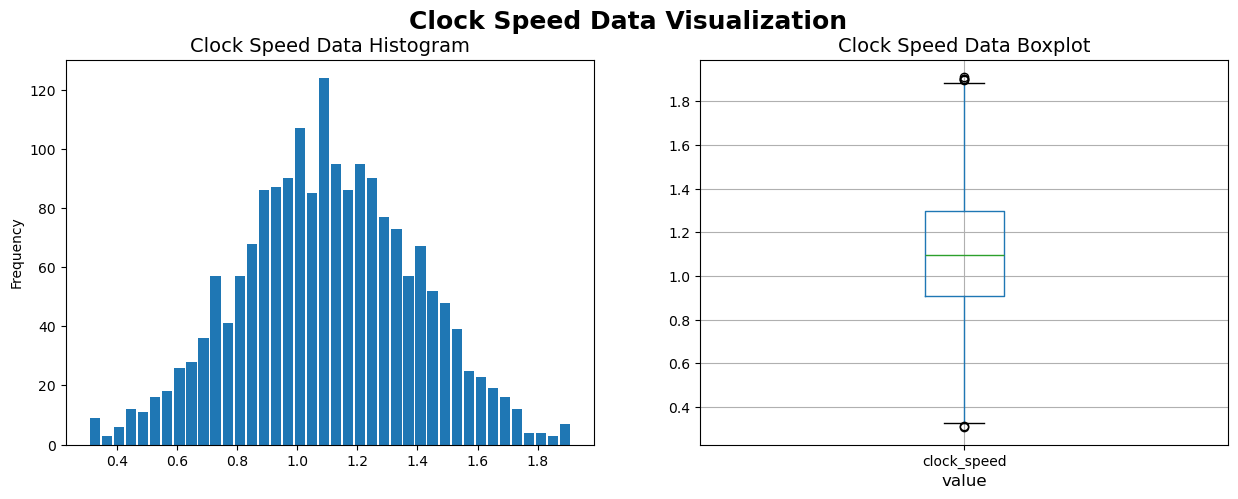

In [305]:
visualizeNumericData('clock_speed')

Jika melihat hasil visualisasi boxplot, median dari data pada kolom Clock Speed berada kurang lebih tepat di tengah nilai minimum dan maksimum, serta ditengah Q1 dan Q3. Hal tersebut menunjukkan bahwa data pada kolom Battery Power cenderung simetris/tidak jauh dari distribusi normal. Gambar boxplot juga menunjukkan adanya outlier di atas dan di bawah maksimum dan minimum. Adanya outlier mengindikasikan bahwa data dicurigai tidak mendekati distribusi normal. Namun, jika kita melihat histogram, bentuk lonceng yang dihasilkan kurang lebih simetris dan titik puncak kurva berada kurang lebih tepat ditengah-tengah kurva/dekat dengan rata-rata.

#### Kolom RAM <a id="kolom-ram"></a>

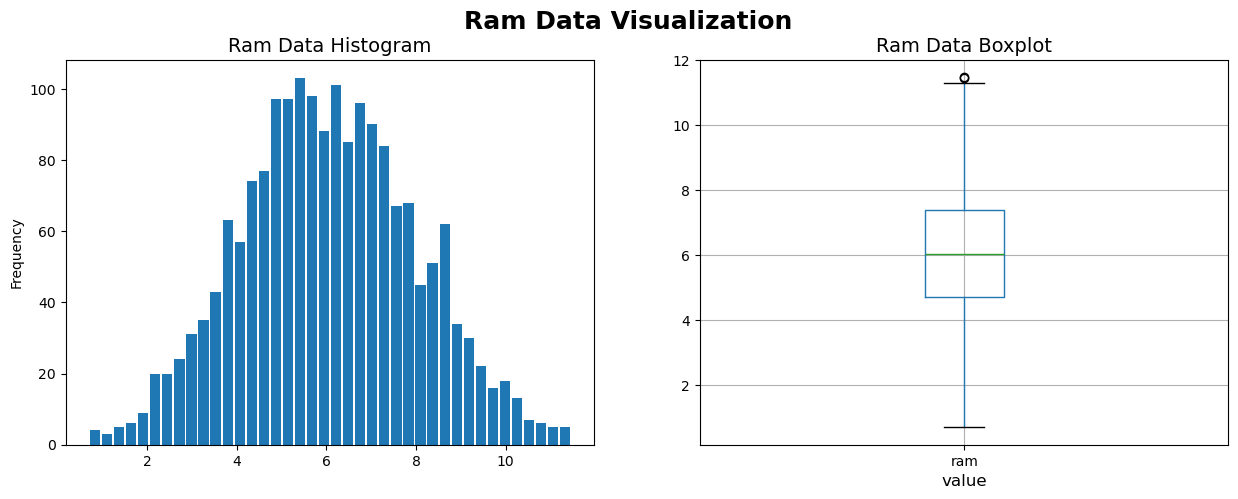

In [306]:
visualizeNumericData('ram')

Jika melihat hasil visualisasi boxplot, median dari data pada kolom RAM berada kurang lebih tepat di tengah nilai minimum dan maksimum, serta ditengah Q1 dan Q3. Hal tersebut menunjukkan bahwa data pada kolom RAM cenderung simetris/tidak jauh dari distribusi normal. Gambar boxplot juga menunjukkan adanya outlier di atas maksimum. Adanya outlier mengindikasikan bahwa data dicurigai tidak mendekati distribusi normal. Namun, jika kita melihat histogram, bentuk lonceng yang dihasilkan kurang lebih simetris dan titik puncak kurva berada kurang lebih tepat ditengah-tengah kurva/dekat dengan rata-rata.

#### Kolom N Cores <a id="kolom-n-cores"></a>

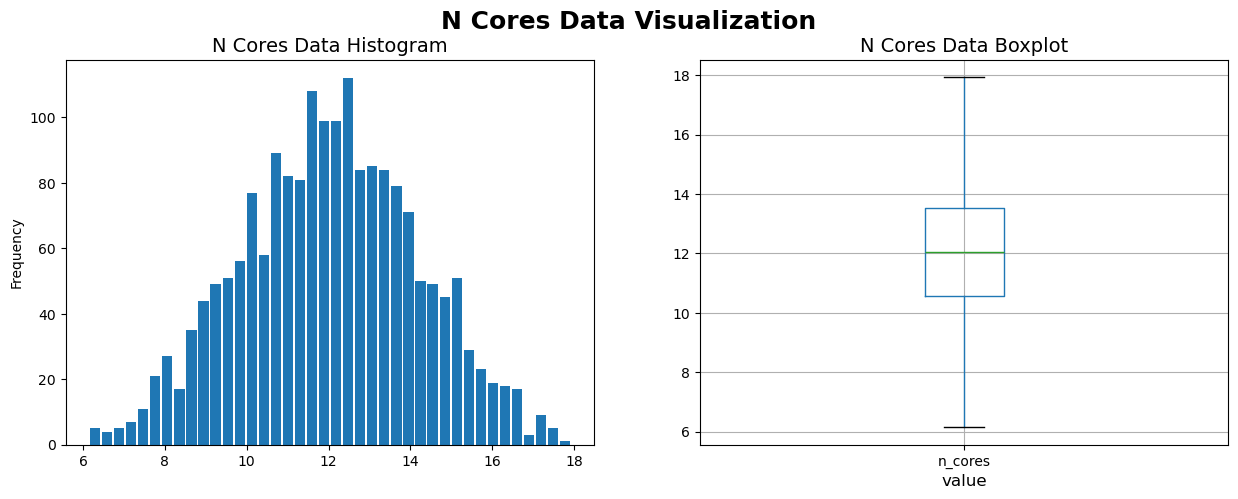

In [307]:
visualizeNumericData('n_cores')

Jika melihat hasil visualisasi boxplot, median dari data pada kolom N Cores berada kurang lebih tepat di tengah nilai minimum dan maksimum, serta ditengah Q1 dan Q3. Hal tersebut menunjukkan bahwa data pada kolom N Cores cenderung simetris/tidak jauh dari distribusi normal. Gambar boxplot juga menunjukkan bahwa tidak terdapat outlier baik diatas maupun dibawah maksimum dan minimum. Adanya outlier mengindikasikan bahwa data dicurigai tidak mendekati distribusi normal. Namun, jika kita melihat histogram, bentuk lonceng yang dihasilkan kurang lebih simetris dan titik puncak kurva berada kurang lebih tepat ditengah-tengah kurva/dekat dengan rata-rata.

#### Kolom Use Time <a id="kolom-use-time"></a>

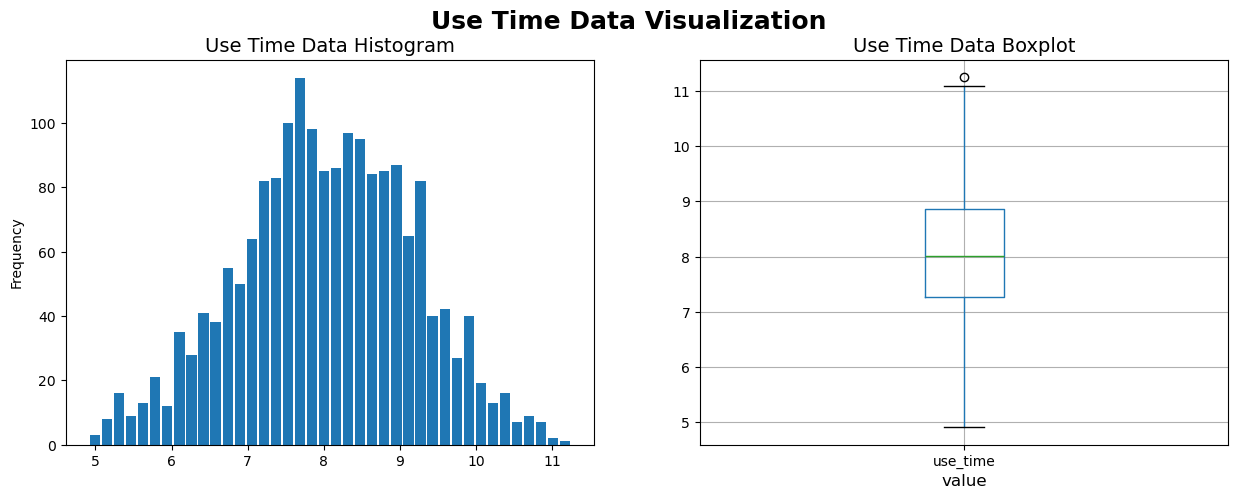

In [308]:
visualizeNumericData('use_time')

Jika melihat hasil visualisasi boxplot, median dari data pada kolom Use Time berada tidak tepat di tengah nilai minimum dan maksimum, serta tidak ditengah Q1 dan Q3. Nilai median lebih dekat ke minimum atau Q1. Hal tersebut mendukung bahwa data pada kolom RAM tidak simetris/tidak dekat dari distribusi normal dan data memiliki <i>skewness</i> positif. Gambar boxplot menunjukkan adanya outlier di atas maksimum yang mengindikasikan bahwa data dicurigai menyimpang dari distribusi normal. Selain itu, jika kita melihat histogram, bentuk lonceng yang dihasilkan tidak simetris dan titik puncak kurva berada di bagian kiri kurva, bukan ditengah. Hal ini mendukung bahwa data memiliki <i>skewness</i> positif.

#### Kolom Px Width <a id="kolom-px-width"></a>

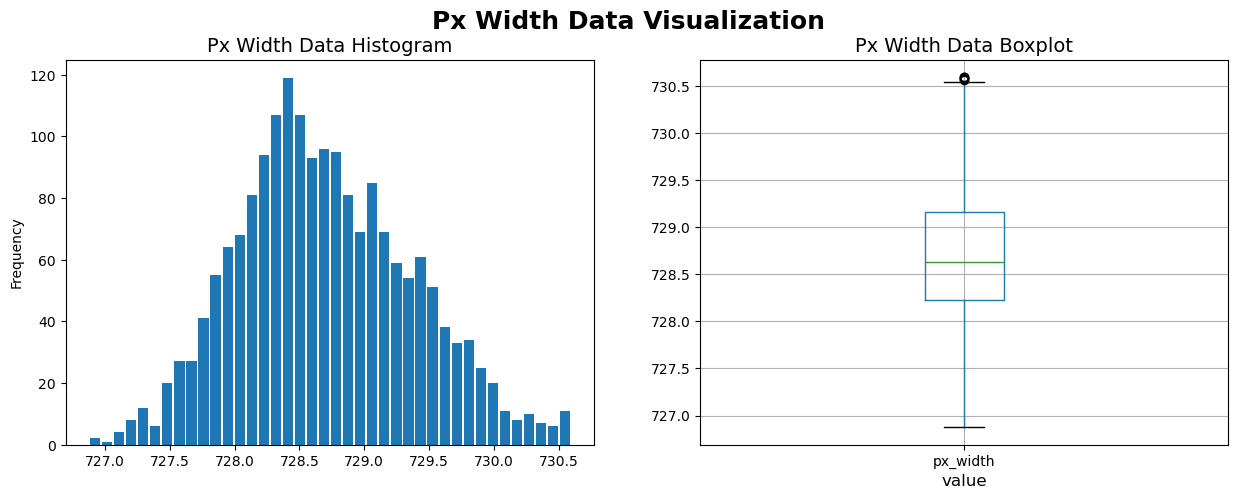

In [309]:
visualizeNumericData('px_width')

Jika melihat hasil visualisasi boxplot, median dari data pada kolom Px Width berada tidak tepat di tengah nilai minimum dan maksimum, serta tidak ditengah Q1 dan Q3. Nilai median lebih dekat ke minimum atau Q1. Hal tersebut mendukung bahwa data pada kolom RAM tidak simetris/tidak dekat dari distribusi normal dan data memiliki <i>skewness</i> positif. Gambar boxplot menunjukkan adanya outlier di atas maksimum yang mengindikasikan bahwa data dicurigai menyimpang dari distribusi normal. Selain itu, jika kita melihat histogram, bentuk lonceng yang dihasilkan tidak simetris dan titik puncak kurva berada di bagian kiri kurva, bukan ditengah. Hal ini mendukung bahwa data memiliki <i>skewness</i> positif.

#### Kolom Px Height <a id="kolom-px-height"></a>

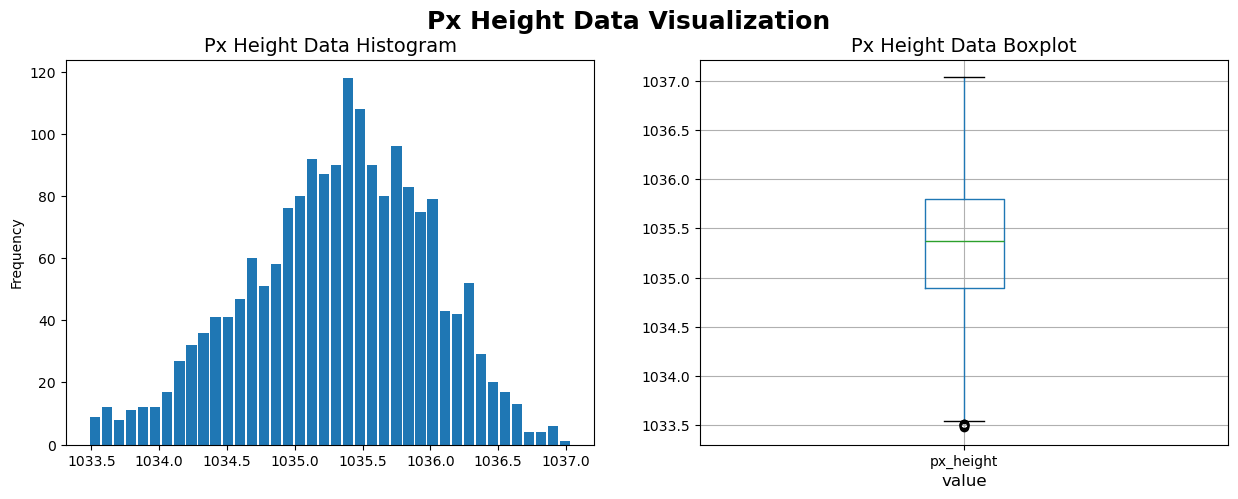

In [310]:
visualizeNumericData('px_height')

Jika melihat hasil visualisasi boxplot, median dari data pada kolom Px Height berada tidak tepat di tengah nilai minimum dan maksimum, serta tidak ditengah Q1 dan Q3. Nilai median lebih dekat ke maksimum atau Q3. Hal tersebut mendukung bahwa data pada kolom RAM tidak simetris/tidak dekat dari distribusi normal dan data memiliki <i>skewness</i> negatif. Gambar boxplot menunjukkan adanya outlier di bawah minimum yang mengindikasikan bahwa data dicurigai menyimpang dari distribusi normal. Selain itu, jika kita melihat histogram, bentuk lonceng yang dihasilkan tidak simetris dan titik puncak kurva berada di bagian kanan kurva, bukan ditengah. Hal ini mendukung bahwa data memiliki <i>skewness</i> negatif.

#### Kolom 5G <a id="kolom-5G"></a>

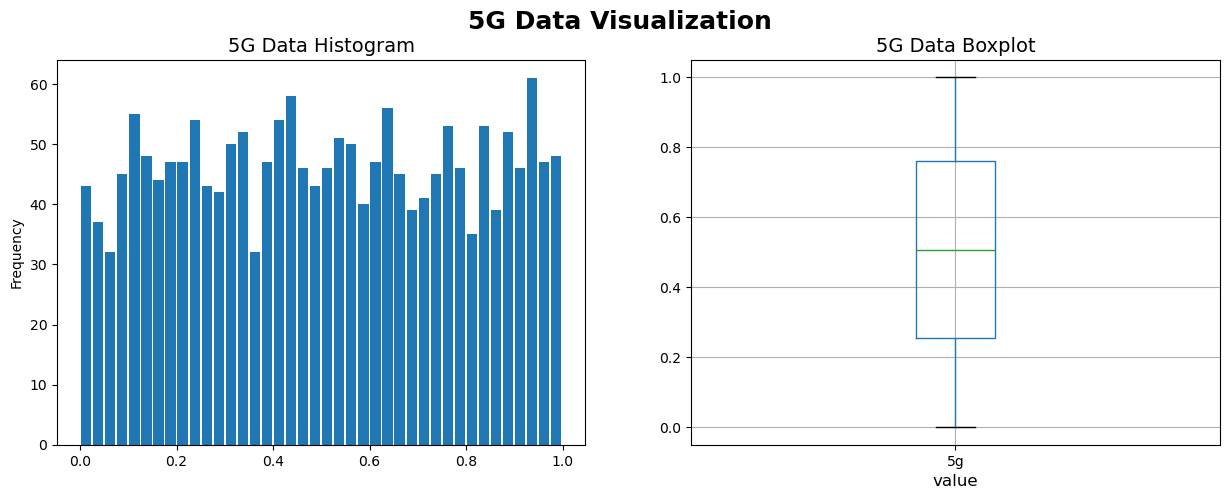

In [311]:
visualizeNumericData('5g')

Jika melihat hasil visualisasi boxplot, median dari data pada kolom 5G berada kurang lebih tepat di tengah nilai minimum dan maksimum, serta ditengah Q1 dan Q3. Hal tersebut menunjukkan bahwa data pada kolom N Cores cenderung simetris/tidak jauh dari distribusi normal. Gambar boxplot juga menunjukkan bahwa tidak terdapat outlier baik diatas maupun dibawah maksimum dan minimum. Tidak adanya outlier mengindikasikan bahwa data dicurigai tidak jauh dari distribusi normal. Namun, jika kita melihat histogram, kurva tidak menunjukkan bentuk kurva lonceng dan memiliki banyak puncak dan lembah. Hal ini mendukung bahwa kurva tidak dekat dari distribusi normal.

#### Kolom Brand <a id="kolom-brand"></a>

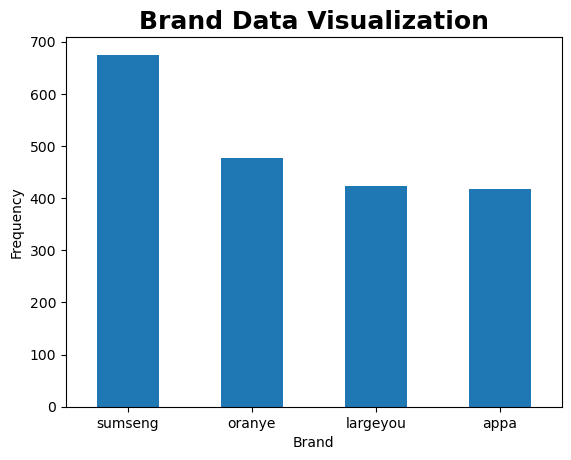

In [312]:
visualizeStringData('brand')

Dari hasil visualisasi kolom Brand, dapat dilihat bahwa pada <i>database</i> terdapat 4 jenis Brand, yaitu sumseng, oranye, largeyou, dan appa. Brand yang paling sering muncul adalah sumseng dengan angka kemunculan mendekati 700. Lalu yang kedua adalah oranye dengan angka kemunculan mendekati 500. Kemudian yang ketiga adalah largeyou dengan angka kemunculan sekitar 450. Dan yang terakhir/paling jarang muncul adalah appa dengan angka kemunculan kurang lebih 450 juga, tetapi kurang dari largeyou.

#### Kolom Grade <a id="kolom-grade"></a>

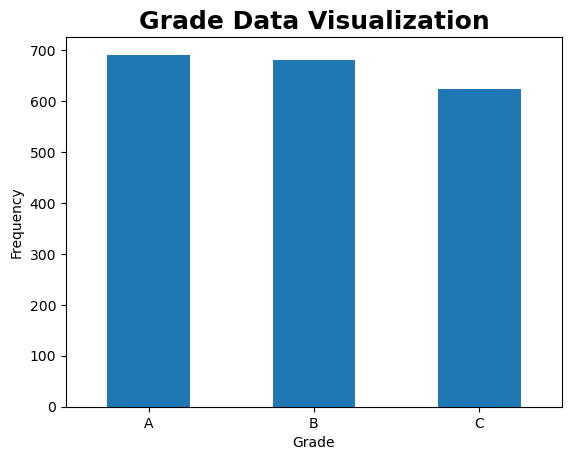

In [313]:
visualizeStringData('grade')

Dari hasil visualisasi kolom Grade, dapat dilihat bahwa pada <i>database</i> terdapat 3 jenis Grade, yaitu A, B, dan C. Grade yang paling sering muncul adalah A dengan angka kemunculan mendekati 700. Lalu yang kedua adalah B dengan angka kemunculan mendekati 700 juga, tetapi jumlahnya kurang dari jumlah kemunculan A. Dan yang terakhir/paling jarang muncul adalah C dengan angka kemunculan kurang lebih 650.

In [322]:
def normalityTest(col) :
    k2, p_value = stats.normaltest(df[col])
    print(f"Nilai K^2 dari data pada kolom {col} adalah {k2} dengan p-value sebesar {p_value}")
    

In [323]:
normalityTest('battery_power')

Nilai K^2 dari data pada kolom battery_power adalah 4.839376665312213 dengan p-value sebesar 0.08894933574293216


In [324]:
normalityTest('clock_speed')

Nilai K^2 dari data pada kolom clock_speed adalah 3.9785388597826525 dengan p-value sebesar 0.13679532752564016


In [325]:
normalityTest('ram')

Nilai K^2 dari data pada kolom ram adalah 11.38368420635015 dengan p-value sebesar 0.003373373140979018


In [326]:
normalityTest('n_cores')

Nilai K^2 dari data pada kolom n_cores adalah 15.12049407410536 dengan p-value sebesar 0.0005207465842924462


In [327]:
normalityTest('use_time')

Nilai K^2 dari data pada kolom use_time adalah 9.346037151457164 dengan p-value sebesar 0.009344021277879064


In [328]:
normalityTest('px_width')

Nilai K^2 dari data pada kolom px_width adalah 29.72810382867117 dengan p-value sebesar 3.5044855603139657e-07


In [329]:
normalityTest('px_height')

Nilai K^2 dari data pada kolom px_height adalah 32.76639517998093 dengan p-value sebesar 7.671277457299589e-08


In [330]:
normalityTest('5g')

Nilai K^2 dari data pada kolom 5g adalah 1354.9068956306996 dengan p-value sebesar 6.105283952173837e-295
